In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# downlaod the data from the file
df1 = pd.read_csv('capstone_project_2/fuel consumption 2019.csv')
df1.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model-Year             1046 non-null   int64  
 1   Make                   1046 non-null   object 
 2   Model                  1046 non-null   object 
 3   Vehicle-Class          1046 non-null   object 
 4   Engine-Size            1046 non-null   float64
 5   Cylinders              1046 non-null   int64  
 6   Transmission           1046 non-null   object 
 7   Fuel-Type              1046 non-null   object 
 8   Fuel-Consumption-City  1046 non-null   float64
 9   Fuel-Consumption-Hwy   1046 non-null   float64
 10  Fuel-Consumption-Comb  1046 non-null   float64
 11  CO2-Emissions          1046 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 98.2+ KB


In [4]:
df1.shape

(1046, 12)

In [93]:
# Select and copy the desired features from df1
df_1 = df1.iloc[:, [0, 1,2,3,4,5,11]].copy()


In [94]:
# Assign the appropriate columns name to each feature copied from the orginal dataframe 
df_1.columns = ['year', 'manufacturer','model','type','size', 'cylinders', 'co2-emissions']
df_1.head()

,year,manufacturer,model,type,size,cylinders,co2-emissions
0,2019,Acura,ILX,Compact,2.4,4,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,210
4,2019,Acura,NSX,Two-seater,3.5,6,261


In [95]:
# Overview the general context of the data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1046 non-null   int64  
 1   manufacturer   1046 non-null   object 
 2   model          1046 non-null   object 
 3   type           1046 non-null   object 
 4   size           1046 non-null   float64
 5   cylinders      1046 non-null   int64  
 6   co2-emissions  1046 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 57.3+ KB


In [8]:
# check the dimensions of the dataframe
df_1.shape

(1046, 8)

In [9]:
#check the number of missing values from the data
df_1.isnull().sum()

year             0
manufacturer     0
model            0
type             0
size             0
cylinders        0
transmission     0
co2-emissions    0
dtype: int64

In [10]:
# Filter the object type features from the data
df_1.select_dtypes(include=['object']).tail()

,manufacturer,model,type,transmission
1041,Volvo,XC40 T5 AWD,SUV: Small,AS8
1042,Volvo,XC60 T5 AWD,SUV: Small,AS8
1043,Volvo,XC60 T6 AWD,SUV: Small,AS8
1044,Volvo,XC90 T5 AWD,SUV: Standard,AS8
1045,Volvo,XC90 T6 AWD,SUV: Standard,AS8


In [ ]:
df_1 = 

In [11]:
#check unique or invalid values
df_1.manufacturer.nunique()

39

In [12]:
#check invalid values
df_1.model.nunique()

746

In [13]:
df_1['type'].unique()

array(['Compact', 'SUV: Small', 'Two-seater', 'Mid-size', 'Minicompact',
       'Subcompact', 'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan',
       'Van: Passenger', 'Special purpose vehicle',
       'Station wagon: Mid-size'], dtype=object)

In [14]:
df_1.transmission.unique()

array(['AM8', 'AS9', 'AM7', 'AM9', 'AS10', 'AM6', 'A8', 'AS8', 'M6', 'A9',
       'AS6', 'A6', 'A10', 'M7', 'AV', 'M5', 'A5', 'A4', 'AV7', 'AS7',
       'AV8', 'AV6', 'AV10', 'A7', 'AS5'], dtype=object)

In [15]:
# Read and dowanlaod the file
df2 = pd.read_csv('USA_cars_datasets.csv')
df2.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [86]:
df2.shape

(2499, 13)

In [16]:

df_2 = df2.iloc[:, [1, 2, 3, 4, 5, 6, 7]].copy()

In [17]:
df_2.columns = ['price','manufacturer', 'model', 'year', 'title_status', 'odometer', 'paint_color']
df_2.head()

,price,manufacturer,model,year,title_status,odometer,paint_color
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black
1,2899,ford,se,2011,clean vehicle,190552.0,silver
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver
3,25000,ford,door,2014,clean vehicle,64146.0,blue
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red


In [18]:
df_2.shape

(2499, 7)

In [19]:
df_2.isnull().sum()

price           0
manufacturer    0
model           0
year            0
title_status    0
odometer        0
paint_color     0
dtype: int64

In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   manufacturer  2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   odometer      2499 non-null   float64
 6   paint_color   2499 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 136.8+ KB


In [21]:
df_2.select_dtypes(include=[object]).head()

,manufacturer,model,title_status,paint_color
0,toyota,cruiser,clean vehicle,black
1,ford,se,clean vehicle,silver
2,dodge,mpv,clean vehicle,silver
3,ford,door,clean vehicle,blue
4,chevrolet,1500,clean vehicle,red


In [22]:
df_2.manufacturer.unique()

array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram'], dtype=object)

In [23]:
df_2.model.nunique()

127

In [24]:
# Clean data to get the desired values and keep consistency

df_2['title_status'] = df_2['title_status'].apply(lambda x :x).str.replace('vehicle', '').str.replace('insurance','')
df_2['title_status'].unique()

array(['clean ', 'salvage '], dtype=object)

In [25]:
df_2.paint_color.nunique()

49

In [26]:
key = ['manufacturer', 'year','model']

In [27]:
merged_12= pd.merge(df_2, df_1, on=key, how= 'outer')

In [28]:
merged_12

,price,manufacturer,model,year,title_status,odometer,paint_color,type,size,cylinders,transmission,co2-emissions
0,6300.0,toyota,cruiser,2008,clean,274117.0,black,NaN,NaN,NaN,NaN,NaN
1,2899.0,ford,se,2011,clean,190552.0,silver,NaN,NaN,NaN,NaN,NaN
2,5350.0,dodge,mpv,2018,clean,39590.0,silver,NaN,NaN,NaN,NaN,NaN
3,5700.0,dodge,mpv,2018,clean,45561.0,white,NaN,NaN,NaN,NaN,NaN
4,4160.0,dodge,mpv,2018,clean,32870.0,gray,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3540,NaN,Volvo,XC40 T5 AWD,2019,NaN,NaN,NaN,SUV: Small,2.0,4.0,AS8,211.0
3541,NaN,Volvo,XC60 T5 AWD,2019,NaN,NaN,NaN,SUV: Small,2.0,4.0,AS8,233.0
3542,NaN,Volvo,XC60 T6 AWD,2019,NaN,NaN,NaN,SUV: Small,2.0,4.0,AS8,242.0
3543,NaN,Volvo,XC90 T5 AWD,2019,NaN,NaN,NaN,SUV: Standard,2.0,4.0,AS8,233.0


In [29]:
file = open('capstone_project_2/autos.csv',encoding="ISO-8859-1")
df3 = pd.read_csv(file)
df3.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [87]:
df3.shape

(371528, 20)

In [30]:
# Convert the value in kilometers into miles
df3['kilometer'] = round(df3['kilometer'].apply(lambda x : x * 0.621371,1))

In [31]:
df_3 = df3.iloc[:, [4,5,6,8,9,10,11,13,14,16]].copy()

In [32]:
df_3.columns = ['price','abtest', 'type','transmission','powerPS','model','odometer', 'fuel','manufacturer', 'dateCreated']
df_3.head()

,price,abtest,type,transmission,powerPS,model,odometer,fuel,manufacturer,dateCreated
0,480,test,NaN,manuell,0,golf,93206.0,benzin,volkswagen,2016-03-24 00:00:00
1,18300,test,coupe,manuell,190,NaN,77671.0,diesel,audi,2016-03-24 00:00:00
2,9800,test,suv,automatik,163,grand,77671.0,diesel,jeep,2016-03-14 00:00:00
3,1500,test,kleinwagen,manuell,75,golf,93206.0,benzin,volkswagen,2016-03-17 00:00:00
4,3600,test,kleinwagen,manuell,69,fabia,55923.0,diesel,skoda,2016-03-31 00:00:00


In [33]:
df3.shape

(371528, 20)

In [34]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         371528 non-null  int64  
 1   abtest        371528 non-null  object 
 2   type          333659 non-null  object 
 3   transmission  351319 non-null  object 
 4   powerPS       371528 non-null  int64  
 5   model         351044 non-null  object 
 6   odometer      371528 non-null  float64
 7   fuel          338142 non-null  object 
 8   manufacturer  371528 non-null  object 
 9   dateCreated   371528 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 28.3+ MB


In [199]:
df_3['dateCreated'] = df3['dateCreated'].str.replace('00:00:00','')

In [90]:
df_3['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [200]:
df_3.select_dtypes(include=['object']).head()

,abtest,type,transmission,model,fuel,manufacturer,dateCreated
2,test,suv,automatic,grand,diesel,jeep,2016-03-14
3,test,kleinwagen,manual,golf,benzin,volkswagen,2016-03-17
4,test,kleinwagen,manual,fabia,diesel,skoda,2016-03-31
5,test,limousine,manual,3er,benzin,bmw,2016-04-04
6,test,cabrio,manual,2_reihe,benzin,peugeot,2016-04-01


In [36]:
df_3.abtest.value_counts(normalize=True)

test       0.518359
control    0.481641
Name: abtest, dtype: float64

In [37]:
df_3.type.unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [38]:
# Data cleaning 
df_3['transmission'] = df_3['transmission'].apply(lambda x: x).str.replace('k', 'c').str.replace('manuell', 'manual')
df_3.transmission.unique()

array(['manual', 'automatic', nan], dtype=object)

In [39]:
df_3.fuel.unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [40]:
df_3.model.nunique()

251

In [41]:
df_3.manufacturer.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada'], dtype=object)

In [42]:
df_3

,price,abtest,type,transmission,powerPS,model,odometer,fuel,manufacturer,dateCreated
0,480,test,NaN,manual,0,golf,93206.0,benzin,volkswagen,2016-03-24 00:00:00
1,18300,test,coupe,manual,190,NaN,77671.0,diesel,audi,2016-03-24 00:00:00
2,9800,test,suv,automatic,163,grand,77671.0,diesel,jeep,2016-03-14 00:00:00
3,1500,test,kleinwagen,manual,75,golf,93206.0,benzin,volkswagen,2016-03-17 00:00:00
4,3600,test,kleinwagen,manual,69,fabia,55923.0,diesel,skoda,2016-03-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,NaN,0,NaN,12427.0,NaN,sonstige_autos,2016-03-14 00:00:00
371524,1199,test,cabrio,automatic,101,fortwo,77671.0,benzin,smart,2016-03-05 00:00:00
371525,9200,test,bus,manual,102,transporter,93206.0,diesel,volkswagen,2016-03-19 00:00:00
371526,3400,test,kombi,manual,100,golf,93206.0,diesel,volkswagen,2016-03-20 00:00:00


In [43]:
df_3.isnull().sum()

price               0
abtest              0
type            37869
transmission    20209
powerPS             0
model           20484
odometer            0
fuel            33386
manufacturer        0
dateCreated         0
dtype: int64

In [44]:
df_3 = df_3[(df_3.type.notna()) ]


In [45]:
df_3.isnull().sum()

price               0
abtest              0
type                0
transmission    10116
powerPS             0
model           13567
odometer            0
fuel            15891
manufacturer        0
dateCreated         0
dtype: int64

In [46]:
df_3 = df_3[df_3.fuel.notna()]
df_3.isnull().sum()

price               0
abtest              0
type                0
transmission     7868
powerPS             0
model           10646
odometer            0
fuel                0
manufacturer        0
dateCreated         0
dtype: int64

In [47]:
df_3 = df_3.dropna()
df_3.notna().sum()

price           299864
abtest          299864
type            299864
transmission    299864
powerPS         299864
model           299864
odometer        299864
fuel            299864
manufacturer    299864
dateCreated     299864
dtype: int64

In [48]:
df_3.describe()

,price,powerPS,odometer
count,2.998640e+05,299864.000000,299864.000000
mean,8.537011e+03,123.536687,77863.807053
std,4.196486e+05,172.038444,24449.198902
min,0.000000e+00,0.000000,3107.000000
25%,1.400000e+03,75.000000,62137.000000
50%,3.500000e+03,114.000000,93206.000000
75%,7.999000e+03,150.000000,93206.000000
max,1.000000e+08,20000.000000,93206.000000


In [49]:
df_3.price.mean()

8537.010731531627

In [243]:
key = ['price','type','transmission','model','manufacturer', 'odometer']

In [244]:
merge_123 = pd.merge(df_3, merged_12, how='outer', on=key)
merge_123.tail()

,price,abtest,type,transmission,powerPS,model,odometer,fuel,manufacturer,dateCreated,year,title_status,paint_color,size,cylinders,co2-emissions
303404,NaN,NaN,SUV: Small,AS8,NaN,XC40 T5 AWD,NaN,NaN,Volvo,NaN,2019.0,NaN,NaN,2.0,4.0,211.0
303405,NaN,NaN,SUV: Small,AS8,NaN,XC60 T5 AWD,NaN,NaN,Volvo,NaN,2019.0,NaN,NaN,2.0,4.0,233.0
303406,NaN,NaN,SUV: Small,AS8,NaN,XC60 T6 AWD,NaN,NaN,Volvo,NaN,2019.0,NaN,NaN,2.0,4.0,242.0
303407,NaN,NaN,SUV: Standard,AS8,NaN,XC90 T5 AWD,NaN,NaN,Volvo,NaN,2019.0,NaN,NaN,2.0,4.0,233.0
303408,NaN,NaN,SUV: Standard,AS8,NaN,XC90 T6 AWD,NaN,NaN,Volvo,NaN,2019.0,NaN,NaN,2.0,4.0,250.0


In [52]:
df_clean = pd.read_csv('capstone_project_2/clean_df.csv')
df_clean.head()

,Unnamed: 0,title,price,mpg,rating
0,0,2020 Acura ILX,26925.0,28.0,4.4 / 5
1,1,2020 Acura RLX,55925.0,23.0,4.0 / 5
2,2,2020 Acura RLX Sport Hybrid,62925.0,28.0,4.0 / 5
3,3,2021 Acura TLX,38525.0,25.0,4.7 / 5
4,4,2020 Acura MDX,45525.0,23.0,4.6 / 5


In [53]:
df_clean.drop(columns=['Unnamed: 0'], axis=1).head()

,title,price,mpg,rating
0,2020 Acura ILX,26925.0,28.0,4.4 / 5
1,2020 Acura RLX,55925.0,23.0,4.0 / 5
2,2020 Acura RLX Sport Hybrid,62925.0,28.0,4.0 / 5
3,2021 Acura TLX,38525.0,25.0,4.7 / 5
4,2020 Acura MDX,45525.0,23.0,4.6 / 5


In [55]:
merged = merge_123.merge(df_clean, how='outer', on='price')
merged.tail()

,price,abtest,type,transmission,powerPS,model,odometer,fuel,manufacturer,dateCreated,year,title_status,paint_color,size,cylinders,co2-emissions,Unnamed: 0,title,mpg,rating
304593,308081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665.0,2019 Aston Martin DBS Superleggera,17.0,NaN
304594,308081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,668.0,2019 Aston Martin DBS Superleggera,17.0,NaN
304595,153081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,666.0,2019 Aston Martin Vantage,21.0,NaN
304596,153081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669.0,2019 Aston Martin Vantage,21.0,NaN
304597,204581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667.0,2019 Aston Martin DB11,20.0,NaN


In [205]:
df_all = merged.drop(columns=['Unnamed: 0'], axis =1)

In [206]:


df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304598 entries, 0 to 304597
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          303552 non-null  float64
 1   abtest         300411 non-null  object 
 2   type           301457 non-null  object 
 3   transmission   301457 non-null  object 
 4   powerPS        300411 non-null  float64
 5   model          303982 non-null  object 
 6   odometer       302936 non-null  float64
 7   fuel           300411 non-null  object 
 8   manufacturer   303982 non-null  object 
 9   dateCreated    300411 non-null  object 
 10  year           3571 non-null    float64
 11  title_status   2525 non-null    object 
 12  paint_color    2525 non-null    object 
 13  size           1046 non-null    float64
 14  cylinders      1046 non-null    float64
 15  co2-emissions  1046 non-null    float64
 16  title          1653 non-null    object 
 17  mpg            1580 non-null 

In [207]:
merged_all.shape

(304598, 19)

In [208]:
merged_all.powerPS.isnull().sum()

4187

In [209]:
merged_all.isnull().sum()

price              1046
abtest             4187
type               3141
transmission       3141
powerPS            4187
model               616
odometer           1662
fuel               4187
manufacturer        616
dateCreated        4187
year             301027
title_status     302073
paint_color      302073
size             303552
cylinders        303552
co2-emissions    303552
title            302945
mpg              303018
rating           303108
dtype: int64

In [210]:
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304598 entries, 0 to 304597
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          303552 non-null  float64
 1   abtest         300411 non-null  object 
 2   type           301457 non-null  object 
 3   transmission   301457 non-null  object 
 4   powerPS        300411 non-null  float64
 5   model          303982 non-null  object 
 6   odometer       302936 non-null  float64
 7   fuel           300411 non-null  object 
 8   manufacturer   303982 non-null  object 
 9   dateCreated    300411 non-null  object 
 10  year           3571 non-null    float64
 11  title_status   2525 non-null    object 
 12  paint_color    2525 non-null    object 
 13  size           1046 non-null    float64
 14  cylinders      1046 non-null    float64
 15  co2-emissions  1046 non-null    float64
 16  title          1653 non-null    object 
 17  mpg            1580 non-null 

In [211]:
merged_all.title_status.unique()

array([nan, 'clean ', 'salvage '], dtype=object)

In [212]:
merged_all['type'].unique()

array(['suv', 'cabrio', 'limousine', 'kombi', 'bus', 'coupe',
       'kleinwagen', 'andere', nan, 'Compact', 'SUV: Small', 'Two-seater',
       'Mid-size', 'Minicompact', 'Subcompact', 'Station wagon: Small',
       'Full-size', 'SUV: Standard', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Special purpose vehicle', 'Station wagon: Mid-size'], dtype=object)

In [213]:
tom_s = set(merged_all['type'].unique()) - set(df6['type'].unique())
tom_s

{'Compact',
 'Full-size',
 'Mid-size',
 'Minicompact',
 'Minivan',
 'Pickup truck: Small',
 'Pickup truck: Standard',
 'SUV: Small',
 'SUV: Standard',
 'Special purpose vehicle',
 'Station wagon: Mid-size',
 'Station wagon: Small',
 'Subcompact',
 'Two-seater',
 'Van: Passenger',
 'andere',
 'cabrio',
 'kleinwagen',
 'kombi',
 'limousine',
 'suv'}

In [73]:

tom_ = [ j  for j in merged_all['type'].unique() if j in df6['type'].unique()]
tom_

['bus', 'coupe']

In [122]:
merged_all['transmission'].unique()

array([ 1.,  2., nan])

In [214]:
merged_all['cylinders'] = pd.to_numeric(merged_all['cylinders'], errors='coerce')
merged_all['cylinders'].isnull().sum()

303552

In [215]:
merged_all['type'].unique()

array(['suv', 'cabrio', 'limousine', 'kombi', 'bus', 'coupe',
       'kleinwagen', 'andere', nan, 'Compact', 'SUV: Small', 'Two-seater',
       'Mid-size', 'Minicompact', 'Subcompact', 'Station wagon: Small',
       'Full-size', 'SUV: Standard', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Special purpose vehicle', 'Station wagon: Mid-size'], dtype=object)

In [216]:
merged_all['type'] = merged['type'].apply(lambda x : x).str.replace('SUV', 'suv').str.replace('Minicompact','mini-ran')\
.str.replace('Station wagon', 'wagon')
merged_all['type'].unique()

array(['suv', 'cabrio', 'limousine', 'kombi', 'bus', 'coupe',
       'kleinwagen', 'andere', nan, 'Compact', 'suv: Small', 'Two-seater',
       'Mid-size', 'mini-ran', 'Subcompact', 'wagon: Small', 'Full-size',
       'suv: Standard', 'Pickup truck: Small', 'Pickup truck: Standard',
       'Minivan', 'Van: Passenger', 'Special purpose vehicle',
       'wagon: Mid-size'], dtype=object)

In [97]:
df5 = pd.read_csv('capstone_project_2/vehicles.csv')
df5.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [217]:

df5_man= df5.manufacturer.unique()
df5_man

array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'ram', nan, 'buick', 'jeep', 'dodge', 'subaru', 'nissan', 'audi',
       'rover', 'lexus', 'honda', 'chrysler', 'mini', 'pontiac',
       'mercedes-benz', 'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen',
       'jaguar', 'acura', 'saturn', 'mazda', 'mercury', 'lincoln',
       'infiniti', 'ferrari', 'fiat', 'tesla', 'land rover',
       'harley-davidson', 'datsun', 'alfa-romeo', 'morgan',
       'aston-martin', 'porche', 'hennessey'], dtype=object)

In [218]:
df3_man = df_3.manufacturer.unique()
df3_man

array(['jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda',
       'nissan', 'renault', 'mercedes_benz', 'seat', 'honda', 'fiat',
       'mini', 'smart', 'opel', 'audi', 'alfa_romeo', 'subaru', 'volvo',
       'mitsubishi', 'hyundai', 'kia', 'suzuki', 'lancia', 'porsche',
       'citroen', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'chrysler',
       'jaguar', 'rover', 'saab', 'daewoo', 'land_rover', 'trabant',
       'lada'], dtype=object)

In [219]:
tom =    set(df3_man)- set(df5_man)
tom

{'alfa_romeo',
 'citroen',
 'dacia',
 'daewoo',
 'daihatsu',
 'lada',
 'lancia',
 'land_rover',
 'mercedes_benz',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'saab',
 'seat',
 'skoda',
 'smart',
 'suzuki',
 'trabant'}

In [220]:
df6 = df5.drop(['id', 'url', 'region', 'region_url', 'vin','image_url', 'description', 'county', 'state', 'lat',
                'long'], axis = 1)
df6.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white


In [ ]:
df6.info()

In [221]:
df6['price'] = df6['price'].apply(lambda x : float(x))
df6.price.dtype

dtype('float64')

In [222]:
df6.cylinders.notna().sum()

197679

In [223]:
df6['cylinders'] = df6['cylinders'].apply(lambda x : x).str.replace('cylinders','')


In [224]:
df6['cylinders'] = pd.to_numeric(df6['cylinders'], errors='coerce')


In [106]:
df6.dtypes

price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
dtype: object

In [114]:
df6['size'].unique()
mapping = {'mid-size':1, 'full-size':2, 'compact':3, 'sub-compact':4}
df6['size'] = df6['size'].map(mapping)
df6['size'] =  pd.to_numeric(df6['size'], errors='coerce' )
df6.dtypes

price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size            float64
type             object
paint_color      object
dtype: object

In [225]:
df6['drive'].unique()

array(['4wd', 'fwd', 'rwd', nan], dtype=object)

In [119]:
print(df6['transmission'].value_counts())
#mapping = {'automatic':1, 'manual':2, 'other':3}
#df6['transmission'] = df6['transmission'].map(mapping)
#df6['transmission'] = pd.to_numeric(df6['transmission'], errors='coerce')
#df6['transmission']

Series([], Name: transmission, dtype: int64)


In [226]:
df6['title_status'].unique()

array(['clean', 'lien', 'rebuilt', 'salvage', 'missing', 'parts only',
       nan], dtype=object)

In [241]:
other = df6[(df6['title_status']!= 'clean') | (df6['title_status']!= 'salvage')].index
df6['title_status'][other].count()
#print(other)

327759

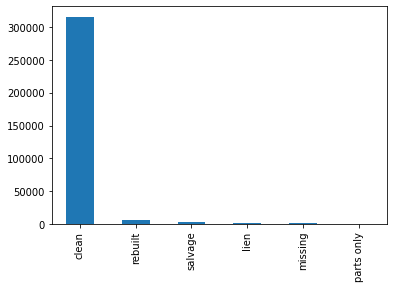

In [234]:
df6['title_status'].value_counts().plot(kind='bar')
plt.show()

In [235]:
mapping = {'clean':1, 'salvage':2, other:3}
df6['title_status'] = df6['title_status'].map(mapping)
df6['title_statsu'].value_counts().plot(kind='bar')
plt.show()

TypeError: unhashable type: 'Int64Index'

In [95]:
df6['fuel'].unique()

array(['gas', 'hybrid', 'diesel', 'other', 'electric', nan], dtype=object)

In [99]:
df6['model'].unique()

array(['new sierra 1500', 'sonata', 'prius', ..., '1990 F350',
       'ranchero gt cobra', 'Studebaker GT Hawk Torisimo'], dtype=object)

In [101]:
df6['type'].unique()

array([nan, 'sedan', 'truck', 'SUV', 'other', 'mini-van', 'wagon',
       'hatchback', 'coupe', 'pickup', 'convertible', 'van', 'bus',
       'offroad'], dtype=object)

In [160]:
df6['year']

0         2000.0
1         2013.0
2         2013.0
3         2003.0
4         2007.0
           ...  
423852    2006.0
423853    2003.0
423854    1994.0
423855    1999.0
423856    2015.0
Name: year, Length: 423857, dtype: float64

In [148]:

key = ['price', 'year', 'manufacturer', 'model', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission',  'size',
       'type', 'paint_color']

In [168]:
grand_df = merged_all.merge(df6, on=key, how='outer')
grand_df.tail(20)

,price,abtest,type,transmission,powerPS,model,odometer,fuel,manufacturer,dateCreated,...,title_status,paint_color,size,cylinders,co2-emissions,title,mpg,rating,condition,drive
728661,3750.0,NaN,NaN,automatic,NaN,tahoe,NaN,gas,chevrolet,NaN,...,clean,NaN,NaN,8.0,NaN,NaN,NaN,NaN,good,4wd
728662,5700.0,NaN,sedan,automatic,NaN,elantra se sedan 4d,119000.0,gas,hyundai,NaN,...,salvage,white,NaN,4.0,NaN,NaN,NaN,NaN,new,fwd
728663,12500.0,NaN,NaN,automatic,NaN,f-150,204222.0,gas,ford,NaN,...,clean,NaN,NaN,6.0,NaN,NaN,NaN,NaN,like new,4wd
728664,7000.0,NaN,SUV,automatic,NaN,pilot ex-l,157.0,gas,honda,NaN,...,clean,NaN,NaN,6.0,NaN,NaN,NaN,NaN,good,4wd
728665,9700.0,NaN,sedan,automatic,NaN,custom sedan,NaN,gas,ford,NaN,...,clean,custom,NaN,NaN,NaN,NaN,NaN,NaN,good,rwd
728666,30000.0,NaN,other,automatic,NaN,ranchero gt cobra,53325.0,gas,ford,NaN,...,clean,custom,NaN,NaN,NaN,NaN,NaN,NaN,excellent,rwd
728667,15000.0,NaN,coupe,automatic,NaN,Studebaker GT Hawk Torisimo,2696.0,gas,NaN,NaN,...,clean,black,NaN,NaN,NaN,NaN,NaN,NaN,excellent,rwd
728668,8700.0,NaN,SUV,automatic,NaN,sorento,101873.0,gas,kia,NaN,...,clean,NaN,NaN,6.0,NaN,NaN,NaN,NaN,good,4wd
728669,29500.0,NaN,pickup,automatic,NaN,tacoma trd off road,75000.0,gas,toyota,NaN,...,clean,blue,NaN,6.0,NaN,NaN,NaN,NaN,like new,4wd
728670,6000.0,NaN,van,manual,NaN,f-700,37000.0,diesel,ford,NaN,...,clean,white,NaN,NaN,NaN,NaN,NaN,NaN,good,rwd


In [169]:
grand_df.shape

(728681, 21)

In [132]:
grand_df.columns

Index(['price', 'abtest', 'type', 'transmission', 'powerPS', 'model',
       'odometer', 'fuel', 'manufacturer', 'dateCreated', 'year',
       'title_status', 'paint_color', 'size', 'cylinders', 'co2-emissions',
       'title', 'mpg', 'rating', 'condition', 'drive'],
      dtype='object')

In [133]:
grand_df.isnull().sum()

price              1046
abtest           428270
type             186067
transmission      99159
powerPS          428270
model             99315
odometer         155160
fuel             101056
manufacturer     111457
dateCreated      428270
year             396367
title_status     398397
paint_color      503953
size             727635
cylinders        530807
co2-emissions    727635
title            726610
mpg              726687
rating           727029
condition        551962
drive            497562
dtype: int64

In [127]:
df_mis = grand_df.loc[grand_df.condition.notna()]
df_mis.isnull().sum()

price                 0
year                  3
manufacturer       8953
model              1859
condition             0
cylinders         38043
fuel                 20
odometer          25260
title_status          0
transmission         72
drive             32269
size             176719
type              28863
paint_color       33127
abtest           176719
powerPS          176719
dateCreated      176719
co2-emissions    176719
title            176719
mpg              176719
rating           176719
dtype: int64

In [134]:
grand_df.dropna()

,price,abtest,type,transmission,powerPS,model,odometer,fuel,manufacturer,dateCreated,...,title_status,paint_color,size,cylinders,co2-emissions,title,mpg,rating,condition,drive


In [177]:
df_con = pd.concat([merged_all, df6], axis=1)

In [178]:
df_con.iloc[20000:30000, :]

,price,abtest,type,transmission,powerPS,model,odometer,fuel,manufacturer,dateCreated,...,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
20000,999.0,control,kleinwagen,manual,0.0,lupo,93206.0,benzin,volkswagen,2016-03-24 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20001,999.0,control,kleinwagen,manual,50.0,lupo,93206.0,benzin,volkswagen,2016-03-31 00:00:00,...,excellent,6.0,gas,146744.0,clean,automatic,fwd,NaN,SUV,black
20002,999.0,control,kleinwagen,manual,60.0,lupo,93206.0,benzin,volkswagen,2016-03-22 00:00:00,...,new,8.0,gas,NaN,clean,automatic,NaN,NaN,NaN,custom
20003,999.0,test,kleinwagen,manual,50.0,lupo,93206.0,benzin,volkswagen,2016-03-10 00:00:00,...,excellent,4.0,gas,141.0,clean,automatic,4wd,NaN,wagon,blue
20004,999.0,test,kleinwagen,manual,0.0,lupo,93206.0,benzin,volkswagen,2016-03-11 00:00:00,...,good,8.0,gas,102000.0,clean,automatic,rwd,NaN,sedan,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,500.0,control,kleinwagen,manual,0.0,golf,3107.0,benzin,volkswagen,2016-03-30 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,500.0,test,kleinwagen,manual,0.0,golf,3107.0,benzin,volkswagen,2016-03-12 00:00:00,...,NaN,4.0,hybrid,56891.0,clean,automatic,fwd,NaN,sedan,NaN
29997,500.0,control,kombi,manual,55.0,punto,77671.0,benzin,fiat,2016-03-18 00:00:00,...,excellent,NaN,gas,123777.0,clean,automatic,NaN,NaN,NaN,NaN
29998,500.0,control,limousine,manual,75.0,2_reihe,93206.0,benzin,peugeot,2016-03-11 00:00:00,...,NaN,NaN,gas,26166.0,clean,automatic,4wd,NaN,NaN,white


In [146]:
df_con.shape

(423857, 33)

In [153]:
df_con.isnull().sum()

price  price            120305
       abtest           123446
       type             122400
       transmission     122400
       powerPS          123446
       model            119875
       odometer         120921
       fuel             123446
       manufacturer     119875
       dateCreated      123446
       year             420286
       title_status     421332
       paint_color      421332
       size             422811
       cylinders        422811
       co2-emissions    422811
       title            422204
       mpg              422277
       rating           422367
year   price                 0
       year              95114
       manufacturer     110615
       model             98473
       condition        247138
       cylinders        227029
       fuel              96643
       odometer         153272
       title_status      96098
       transmission      95792
       drive            192738
       size             423857
       type             182700
       p

In [155]:
import missingno as msno
%matplotlib inline


<AxesSubplot:>

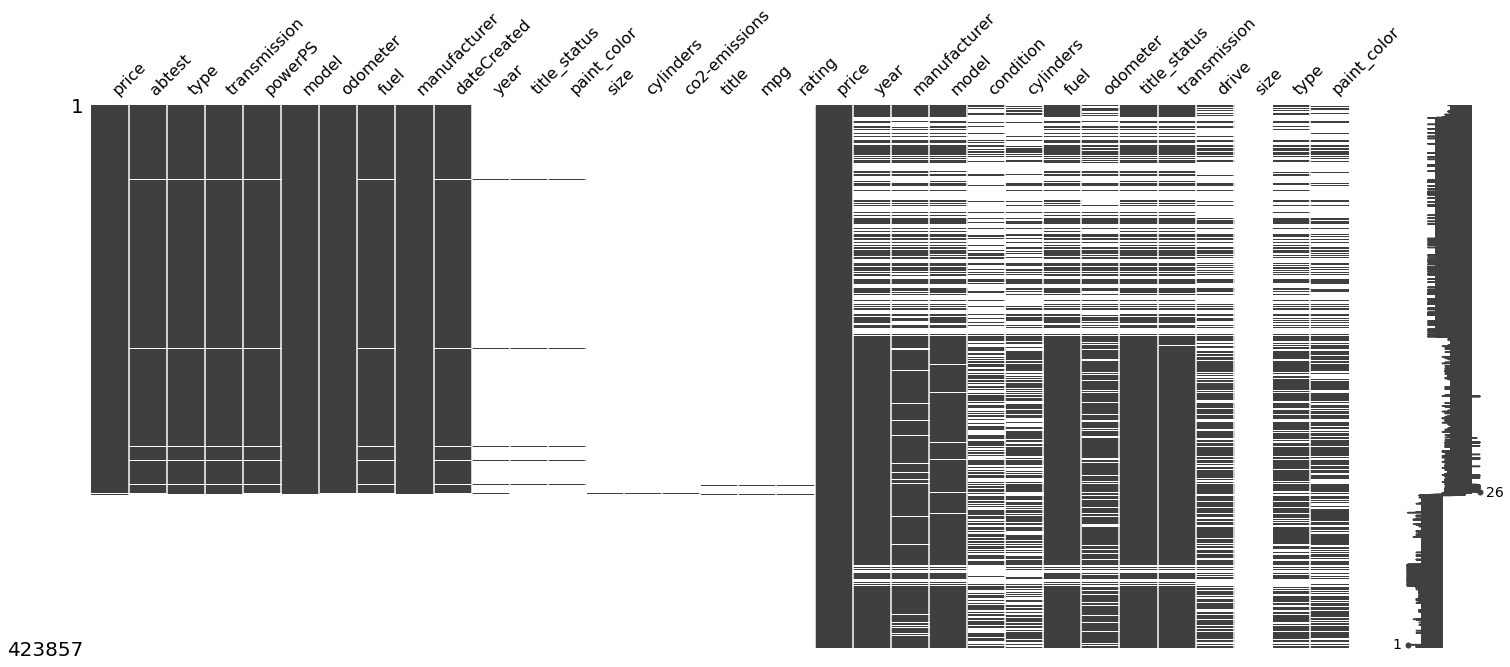

In [179]:
msno.matrix(df_con)

<AxesSubplot:>

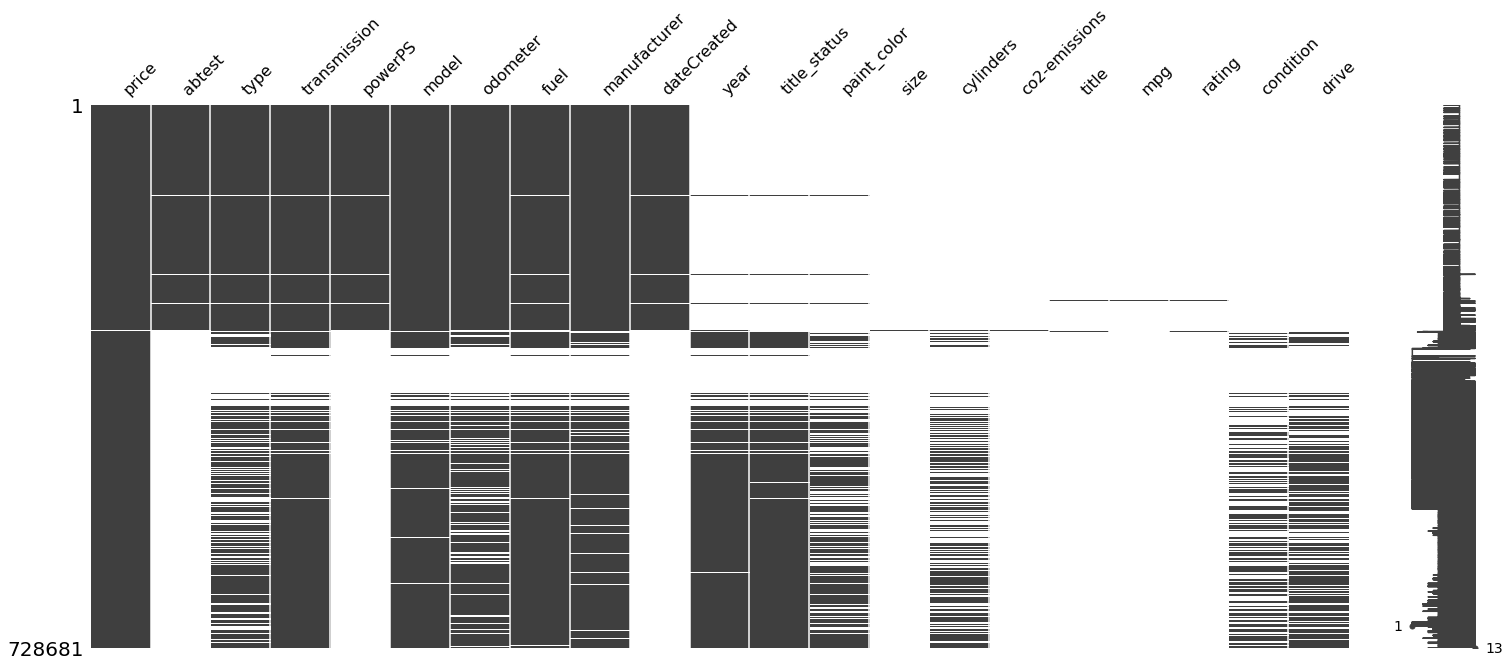

In [159]:
msno.matrix(grand_df)

<AxesSubplot:>

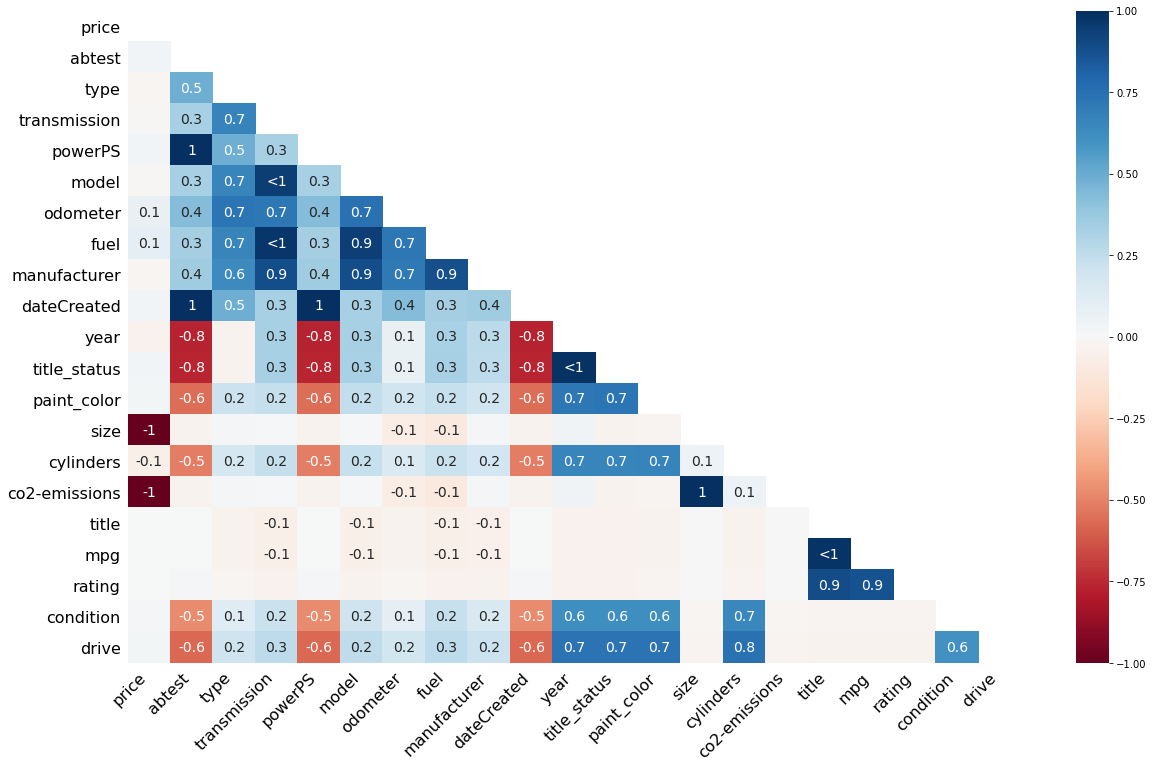

In [245]:
msno.heatmap(grand_df)

<AxesSubplot:>

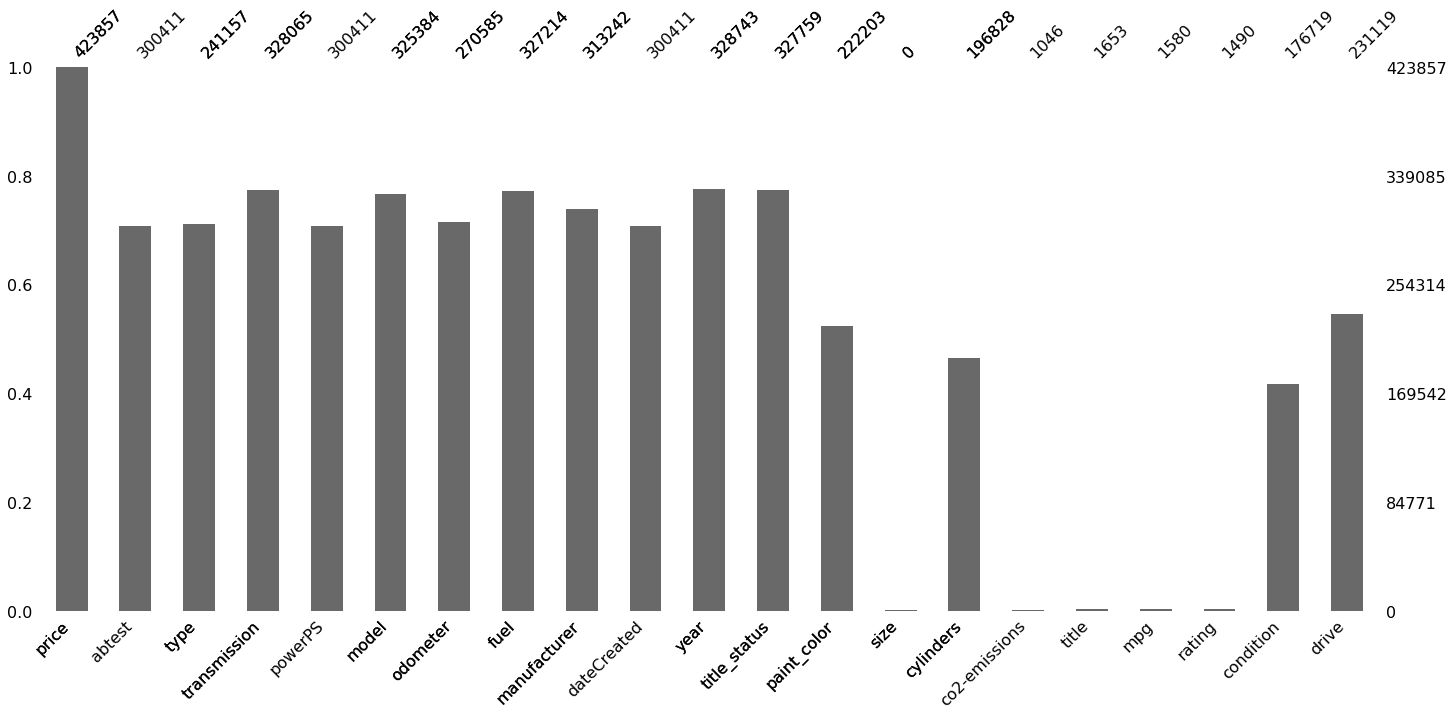

In [181]:
msno.bar(df_con)